<a href="https://colab.research.google.com/github/megmarv/Client-Deposit-Prediction/blob/main/ModelsForMLcw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [25]:
# Load preprocessed datasets
X_train = pd.read_csv('/content/drive/MyDrive/ML/X_balanced.csv').values
y_train = pd.read_csv('/content/drive/MyDrive/ML/y_balanced.csv')['y'].values
X_test = pd.read_csv('/content/drive/MyDrive/ML/X_test_preprocessed.csv').values
y_test = pd.read_csv('/content/drive/MyDrive/ML/y_test_preprocessed.csv')['y'].values

In [26]:
# Define the Feedforward Neural Network model with an additional hidden layer
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Input + 1st hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # 2nd hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),  # 3rd hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │           6,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,385 (64.00 KB)

 Trainable params: 16,385 (64.00 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Epoch 1/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8351 - loss: 0.3811 - val_accuracy: 0.8051 - val_loss: 0.4328 - learning_rate: 0.0010
Epoch 2/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8333 - loss: 0.3841 - val_accuracy: 0.8371 - val_loss: 0.3724 - learning_rate: 0.0010
Epoch 3/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8348 - loss: 0.3804 - val_accuracy: 0.8448 - val_loss: 0.3726 - learning_rate: 0.0010
Epoch 4/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8345 - loss: 0.3797 - val_accuracy: 0.8056 - val_loss: 0.4126 - learning_rate: 0.0010
Epoch 5/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8388 - loss: 0.3736 - val_accuracy: 0.8213 - val_loss: 0.4110 - learning_rate: 0.0010
Epoch 6/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8416 - loss: 0.3688 - val_accuracy: 0.8360 - val_loss: 0.3567 - learning_rate: 0.0010
Epoch 7/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8435 - l

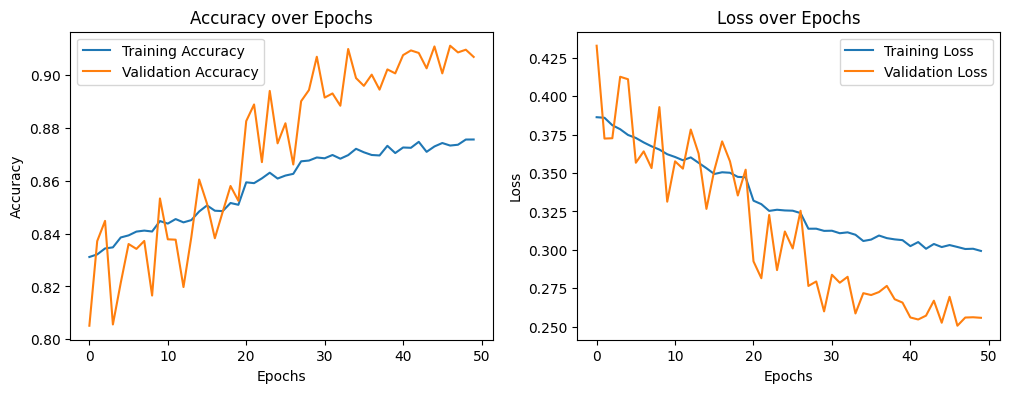

In [32]:

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Save the model
model.save('/content/drive/MyDrive/ML/fnn_model.h5')
print("FNN model saved to Google Drive.")

FNN model saved to Google Drive.
